start

In [1]:
!pip --version

pip 24.3.1 from C:\Users\91830\AppData\Local\Programs\Python\Python313\Lib\site-packages\pip (python 3.13)



In [2]:
!python --version

Python 3.11.8


In [3]:
%pip install pipeline

Note: you may need to restart the kernel to use updated packages.


In [4]:
#Importing labraries

import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns
from scipy import stats


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline

In [5]:
#Download the updated dataset by running.

async def download(url,filename):
    response= await pyfetch(url)
    if response.stutas==200:
        with opne (filename, 'wb') as  f:
            f.write(await response.bytes())

In [6]:
market= "C:\\Users\\91830\\OneDrive\\Desktop\\data set\\Google 2020-2025 Stock Market.csv"


In [7]:
df = pd.read_csv(market, header=0)


In [8]:
#verify loading by displaying the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1264 entries, 0 to 1263
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         1264 non-null   object 
 1   Close        1264 non-null   float64
 2   Open         1264 non-null   float64
 3   High         1264 non-null   float64
 4   Low          1264 non-null   float64
 5   Volume       1264 non-null   int64  
 6   Unnamed: 6   0 non-null      float64
 7   Unnamed: 7   0 non-null      float64
 8   Unnamed: 8   0 non-null      float64
 9   Unnamed: 9   0 non-null      float64
 10  Unnamed: 10  0 non-null      float64
 11  Unnamed: 11  0 non-null      float64
 12  Unnamed: 12  0 non-null      float64
 13  Unnamed: 13  0 non-null      float64
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
 17  Unnamed: 17  0 non-null      float64
dtypes: float64(16), int64(1), object(1)
memory usage

In [9]:
df.head() # updated

,Date,Close,Open,High,Low,Volume,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,1/2/20,68.37,67.08,68.41,67.08,1406731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/3/20,68.03,67.39,68.63,67.28,1179289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1/6/20,69.71,67.50,69.83,67.50,1733149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1/7/20,69.67,69.90,70.15,69.52,1511693,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1/8/20,70.22,69.60,70.58,69.54,1529177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df[['Close']] = np.round(df[['Close']],2) #all  values are rounded to nearest 2 decimal places.
df.head()

,Date,Close,Open,High,Low,Volume,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,1/2/20,68.37,67.08,68.41,67.08,1406731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/3/20,68.03,67.39,68.63,67.28,1179289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1/6/20,69.71,67.50,69.83,67.50,1733149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1/7/20,69.67,69.90,70.15,69.52,1511693,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1/8/20,70.22,69.60,70.58,69.54,1529177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#evalute the dataset for missing data
missing_data = df.isnull()
print(missing_data.head())
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print(" ")

    Date  Close   Open   High    Low  Volume  Unnamed: 6  Unnamed: 7  \
0  False  False  False  False  False   False        True        True   
1  False  False  False  False  False   False        True        True   
2  False  False  False  False  False   False        True        True   
3  False  False  False  False  False   False        True        True   
4  False  False  False  False  False   False        True        True   

   Unnamed: 8  Unnamed: 9  Unnamed: 10  Unnamed: 11  Unnamed: 12  Unnamed: 13  \
0        True        True         True         True         True         True   
1        True        True         True         True         True         True   
2        True        True         True         True         True         True   
3        True        True         True         True         True         True   
4        True        True         True         True         True         True   

   Unnamed: 14  Unnamed: 15  Unnamed: 16  Unnamed: 17  
0         True         T

In [12]:
df.fillna(0)

,Date,Close,Open,High,Low,Volume,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,1/2/20,68.37,67.08,68.41,67.08,1406731,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1/3/20,68.03,67.39,68.63,67.28,1179289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1/6/20,69.71,67.50,69.83,67.50,1733149,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1/7/20,69.67,69.90,70.15,69.52,1511693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1/8/20,70.22,69.60,70.58,69.54,1529177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1259,1/3/25,193.13,192.73,194.50,191.35,12874957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1260,1/6/25,197.96,195.15,199.56,195.06,19483323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1261,1/7/25,196.71,198.27,202.14,195.94,16966760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1262,1/8/25,195.39,193.95,197.64,193.75,14335341,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
#replace with mean: missing values in attributes that have continuous data are best replace using mean values.
df_open = df['Open'].astype('float').mean(axis=0)  
df['Open'].replace(np.nan, df_open, inplace= True)

C:\Users\91830\AppData\Local\Temp\ipykernel_12536\1198945411.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Open'].replace(np.nan, df_open, inplace= True)


In [14]:
#fixing the data types
df[['Open','Close']]= df[['Open','Close']].astype('float')
df[['Open','Close']]

,Open,Close
0,67.08,68.37
1,67.39,68.03
2,67.50,69.71
3,69.90,69.67
4,69.60,70.22
...,...,...
1259,192.73,193.13
1260,195.15,197.96
1261,198.27,196.71
1262,193.95,195.39


In [15]:
#data Normalization: it is required to normalize a continuous data attribute with respectto the maximum value availible in the dataset.
df['Volume'] = df['Volume']/df['Volume'].max()
df['Volume']

0       0.014384
1       0.012058
2       0.017722
3       0.015457
4       0.015636
          ...   
1259    0.131648
1260    0.199219
1261    0.173487
1262    0.146580
1263    0.212210
Name: Volume, Length: 1264, dtype: float64

In [16]:
#Binning : Binning is a process of creating a categorical attribute which splitsthe values of a continuous data into a specified number of  groups.
 
bins= np.linspace(min(df['Volume']), max(df['Volume']),4)
group_name = ['Low','Medium','High']
df['Volume-binned'] = pd.cut(df['Volume'], bins, labels=group_name, include_lowest=True)
df['Volume-binned']

0       Low
1       Low
2       Low
3       Low
4       Low
       ... 
1259    Low
1260    Low
1261    Low
1262    Low
1263    Low
Name: Volume-binned, Length: 1264, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

Text(0.5, 1.0, 'Volume-binned')

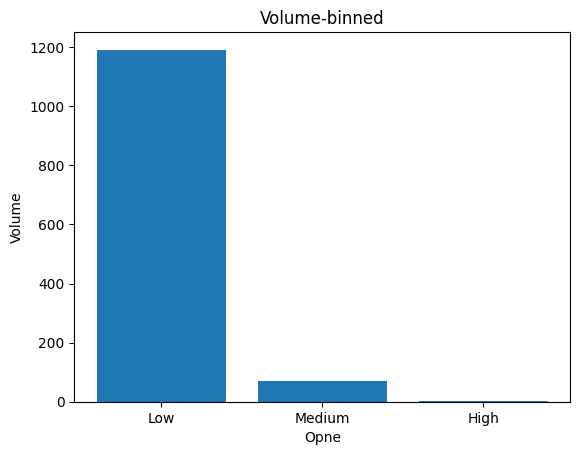

In [17]:
plt.bar(group_name, df['Volume-binned'].value_counts())
plt.xlabel('Opne')
plt.ylabel('Volume')
plt.title('Volume-binned')

#visualize individual features


(0.0, 216.10067745212245)

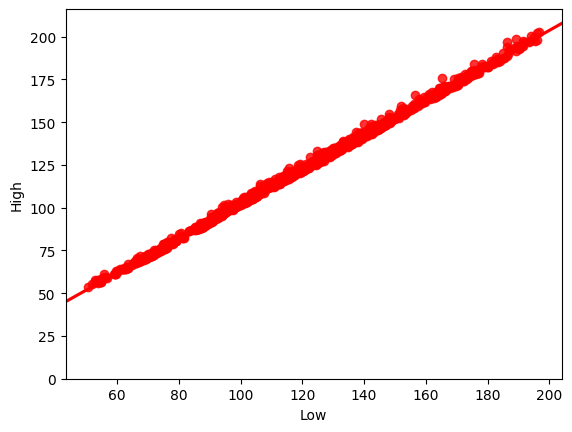

In [18]:
#continuous valued feature

sns.regplot(x='Low', y='High',color='r', data=df)
plt.ylim(0,)

(0.0, 210.3455)

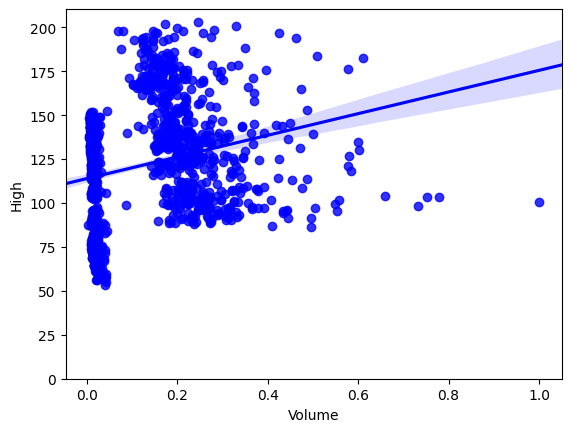

In [19]:
sns.regplot(x='Volume',y='High',color='b',data=df)
plt.ylim(0,)

In [20]:
#correlotion values of the three attributes
for stock in['Close','High','Low']:
    print(f"Correlation of values and {stock}", df[[stock,"Volume"]].corr())

Correlation of values and Close            Close    Volume
Close   1.000000  0.237391
Volume  0.237391  1.000000
Correlation of values and High             High    Volume
High    1.000000  0.242908
Volume  0.242908  1.000000
Correlation of values and Low              Low    Volume
Low     1.000000  0.233692
Volume  0.233692  1.000000


In [21]:
#categorical feature: boxplot
df.head()

,Date,Close,Open,High,Low,Volume,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Volume-binned
0,1/2/20,68.37,67.08,68.41,67.08,0.014384,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low
1,1/3/20,68.03,67.39,68.63,67.28,0.012058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low
2,1/6/20,69.71,67.50,69.83,67.50,0.017722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low
3,1/7/20,69.67,69.90,70.15,69.52,0.015457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low
4,1/8/20,70.22,69.60,70.58,69.54,0.015636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low


In [22]:
#Descriptive Statistical Analysis: generate the statistical description of all the features being used in the data set.
print(df.describe())


             Close         Open         High          Low       Volume  \
count  1264.000000  1264.000000  1264.000000  1264.000000  1264.000000   
mean    120.258552   120.170657   121.568204   118.923718     0.124892   
std      33.201725    33.237409    33.447748    33.006317     0.131814   
min      52.830000    52.830000    53.570000    50.680000     0.003546   
25%      94.325000    94.347500    95.700000    92.750000     0.014501   
50%     121.370000   121.115000   122.670000   120.130000     0.041731   
75%     141.852500   142.115000   143.265000   140.822500     0.211519   
max     198.160000   198.530000   202.880000   196.690000     1.000000   

       Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  Unnamed: 10  \
count         0.0         0.0         0.0         0.0          0.0   
mean          NaN         NaN         NaN         NaN          NaN   
std           NaN         NaN         NaN         NaN          NaN   
min           NaN         NaN         NaN         NaN

In [23]:
#GroupBy
df_gp_test = df[['Close','Low','High']]
group_test=df_gp_test.groupby(['High'],as_index=False).mean()
print(group_test)

        High   Close     Low
0      53.57   52.83   50.68
1      55.33   54.84   51.86
2      56.18   54.89   53.99
3      56.34   56.04   54.82
4      56.48   55.28   54.87
...      ...     ...     ...
1192  198.69  190.15  189.28
1193  199.56  197.96  195.06
1194  200.64  198.16  194.11
1195  202.14  196.71  195.94
1196  202.88  197.12  196.69

[1197 rows x 3 columns]


In [24]:
#Pivot table
group_pivot = group_test.pivot(index='Close', columns='Low')
print(group_pivot)

         High                                                                 \
Low    50.68  51.86  52.80  53.01  53.27  53.72  53.99  54.30  54.53  54.68    
Close                                                                          
52.83   53.57    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
53.62     NaN    NaN    NaN    NaN   57.2    NaN    NaN    NaN    NaN    NaN   
54.22     NaN    NaN    NaN    NaN    NaN  57.61    NaN    NaN    NaN    NaN   
54.84     NaN  55.33    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
54.89     NaN    NaN    NaN    NaN    NaN    NaN  56.18    NaN    NaN    NaN   
...       ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
197.10    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
197.12    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
197.57    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
197.96    NaN    NaN    NaN    NaN    Na

C:\Users\91830\AppData\Local\Temp\ipykernel_12536\2123547688.py:16: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im)


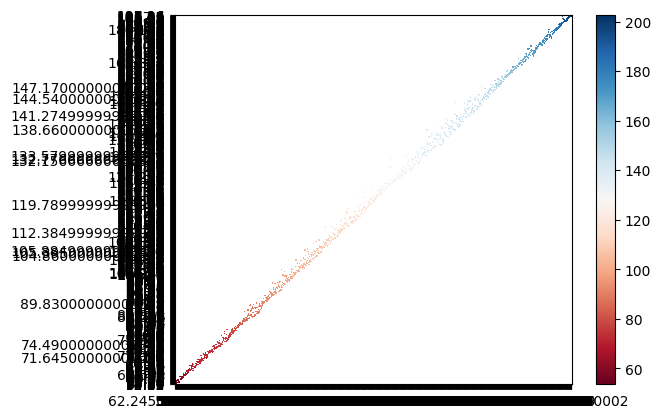

In [25]:

fig, ax = plt.subplots()
im = ax.pcolor(group_pivot, cmap='RdBu')

#label names
row_labels = group_pivot.columns.levels[1]
col_labels = group_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(group_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(group_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

fig.colorbar(im)



In [26]:
#Pearson correlation and p-values: this will help you determine the parameters most likely to have a strong effect on values.

for param in ['Close','High','Low']:
    pearson_coef, p_value = stats.pearsonr(df[param], df['Volume'])
    print(param)
    print("the Pearson correletion coefficient for", param,"is", pearson_coef,"with a P-value of p=", p_value)

Close
the Pearson correletion coefficient for Close is 0.23739064067920185 with a P-value of p= 1.1877871411195473e-17
High
the Pearson correletion coefficient for High is 0.24290832698249465 with a P-value of p= 1.9693369316262757e-18
Low
the Pearson correletion coefficient for Low is 0.23369207891652752 with a P-value of p= 3.86269776685622e-17


##Model Development##

In [27]:
df.head()

,Date,Close,Open,High,Low,Volume,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Volume-binned
0,1/2/20,68.37,67.08,68.41,67.08,0.014384,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low
1,1/3/20,68.03,67.39,68.63,67.28,0.012058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low
2,1/6/20,69.71,67.50,69.83,67.50,0.017722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low
3,1/7/20,69.67,69.90,70.15,69.52,0.015457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low
4,1/8/20,70.22,69.60,70.58,69.54,0.015636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1264 entries, 0 to 1263
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Date           1264 non-null   object  
 1   Close          1264 non-null   float64 
 2   Open           1264 non-null   float64 
 3   High           1264 non-null   float64 
 4   Low            1264 non-null   float64 
 5   Volume         1264 non-null   float64 
 6   Unnamed: 6     0 non-null      float64 
 7   Unnamed: 7     0 non-null      float64 
 8   Unnamed: 8     0 non-null      float64 
 9   Unnamed: 9     0 non-null      float64 
 10  Unnamed: 10    0 non-null      float64 
 11  Unnamed: 11    0 non-null      float64 
 12  Unnamed: 12    0 non-null      float64 
 13  Unnamed: 13    0 non-null      float64 
 14  Unnamed: 14    0 non-null      float64 
 15  Unnamed: 15    0 non-null      float64 
 16  Unnamed: 16    0 non-null      float64 
 17  Unnamed: 17    0 non-null      fl

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore", category=UserWarning) 
%matplotlib inline

In [30]:
#single linear regresion: to find the model for prediction
lm = LinearRegression()

X = df[['Volume']]
Y = df['High']

lm.fit(X,Y)

yhat=lm.predict(X)

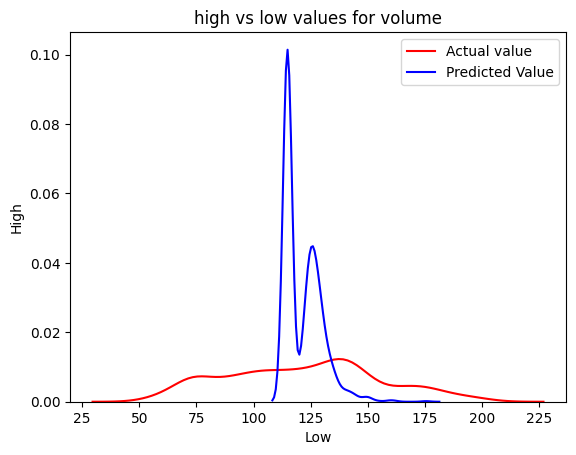

In [31]:
#generate the distribution plot for the predicted values and that of the actual values.  
ax1  = sns.distplot(df['High'], hist=False, color='r', label='Actual Value')

sns.distplot(yhat, hist=False,color='b', label='Fitted Value', ax=ax1)

plt.title('high vs low values for volume')
plt.xlabel('Low')
plt.ylabel('High')
plt.legend(['Actual value', 'Predicted Value'])

plt.show()

In [32]:
#Evaluate the mean Squared error and R^2 score value for the model.  

r2 = mean_squared_error(df['Volume'],yhat)
r2_scores= lm.score(X,Y)
print('The R-Squere for LinearRegression is:', r2_scores)
print('The mean square error of price and predicted value is:', r2)

The R-Squere for LinearRegression is: 0.05900445531743437
The mean square error of price and predicted value is: 14812.314443567202


In [33]:
#Multiple Linear Regression 

lm1 = LinearRegression()
z= df[['Close','High','Low','Volume']]
lm1.fit(z,Y)
y_hat = lm1.predict(z)

Text(0, 0.5, 'Volume-binned')

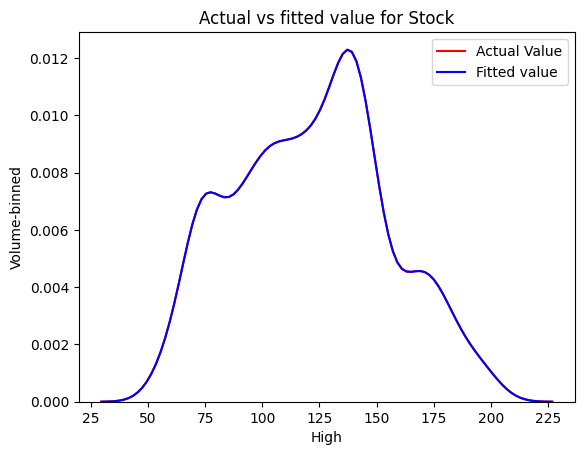

In [34]:
ax2 = sns.distplot(df['High'],hist = False, color ='r', label="Actual Value")
sns.distplot(y_hat, hist=False, color='b',label='Fitted value', ax= ax2)

plt.title('Actual vs fitted value for Stock')
plt.xlabel('High')
plt.ylabel('Volume-binned')


In [35]:
#Polynomial Regression

X = X.to_numpy().flatten()
f1= np.polyfit(X,Y,1)
p1= np.poly1d(f1)

f3 = np.polyfit(X,Y,3)
p3 = np.poly1d(f3)

f5 = np.polyfit(X,Y,5)
p5 = np.poly1d(f5)

In [36]:
#Plot the regression output against the actual data points to note how the data fits in each case.

def PlotPolly(model, independent_variable, dependent_variable, Name):
    x_new = np.linspace(independent_variable.min(), independent_variable.max(),100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variable,'.', x_new, y_new, '-')
    plt.title(f'Polynomial Fit for Stock ~ {Name}')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Volume')

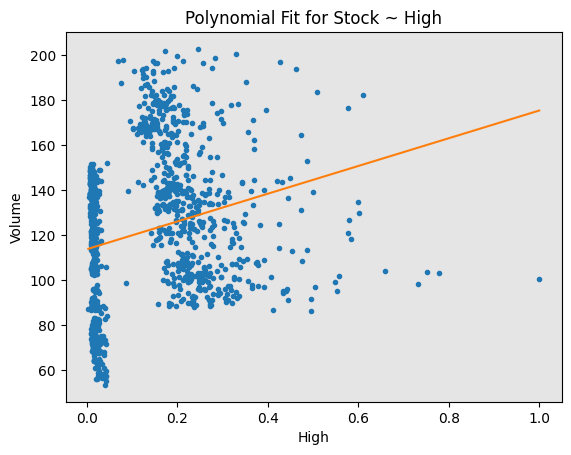

In [37]:
#call for function of degree 1
PlotPolly(p1, X, Y, 'High')

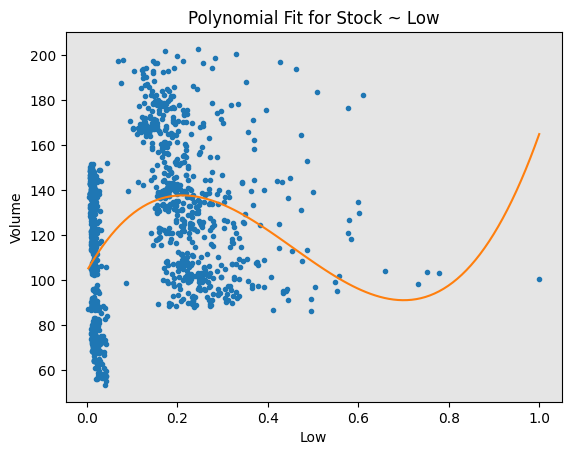

In [38]:
#call for function of degree 3
PlotPolly(p3, X, Y, 'Low')

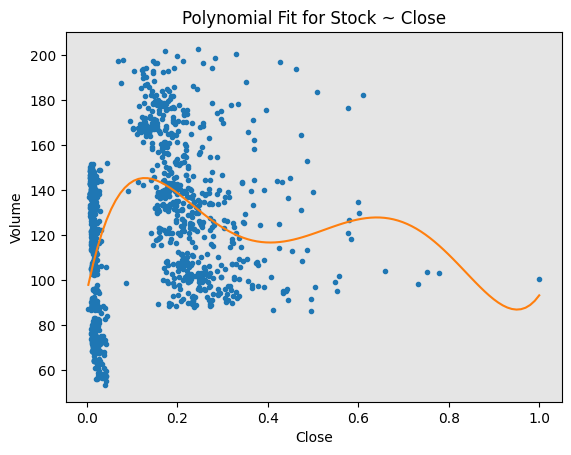

In [39]:
#call for function of degree 5
PlotPolly(p5, X, Y, 'Close')

In [40]:
#calculate the R^2 and MSE value. 
r_squared_1 =r2_score(Y,p1(X))
print('The R-Square value for 1st degree polynomial is: ', r_squared_1)
print('The MSE value for 1st degree polynomial is: ', mean_squared_error(Y,p1(X)))

r_squared_3 = r2_score(Y, p3(X))
print('The R-Square value for 3td degree polynomial is: ', r_squared_3)
print('The MSE value for 3td degree polynomial is: ', mean_squared_error(Y,p3(X)))

r_squared_5= r2_score(Y, p1(X))
print('The R-Square value for 5th degree polynomial is: ', r_squared_1)
print('The MSE value for 5th degree polynomial is: ', mean_squared_error(Y,p5(X)))

The R-Square value for 1st degree polynomial is:  0.05900445531743437
The MSE value for 1st degree polynomial is:  1051.9076569255262
The R-Square value for 3td degree polynomial is:  0.16151072668321975
The MSE value for 3td degree polynomial is:  937.3193017076175
The R-Square value for 5th degree polynomial is:  0.05900445531743437
The MSE value for 5th degree polynomial is:  894.1313113934572


In [41]:
%pip install pipeline

In [42]:
#Pipeline:  create a pipeline parameter scaling, Polynomial feature generation and linear regression. to use the set multiple features as before to create thi pipeline.  
Input =[('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)),('model', LinearRegression())] 
pipe = Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z,Y)
ypipe = pipe.predict(Z)

NameError: name 'Z' is not defined

In [ ]:
print('MSE for multi-variable polynomial pipeline is: ', mean_squared_error(Y, ypipe))
print('R^2 for multi-variable polynomial pipeline is: ', r2_score(Y, ypipe))

MSE for multi-variable polynomial pipeline is:  1.5511202224482416e-27
R^2 for multi-variable polynomial pipeline is:  1.0


In [ ]:
df.head()

,Date,Close,Open,High,Low,Volume,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Volume-binned
0,1/2/20,68.37,67.08,68.41,67.08,0.014384,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low
1,1/3/20,68.03,67.39,68.63,67.28,0.012058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low
2,1/6/20,69.71,67.50,69.83,67.50,0.017722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low
3,1/7/20,69.67,69.90,70.15,69.52,0.015457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low
4,1/8/20,70.22,69.60,70.58,69.54,0.015636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low


##Model Evaluation and Refinement

In [ ]:
#using cross validation to improve the model. 

y_data = df['Close']
x_data = df.drop('Date', axis =1)

In [ ]:
#split the data set into training and testing subsets such that you reserve 10% of the data set for testing purposes.

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)
print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 127
number of training samples: 1137


In [ ]:
lre = LinearRegression()
lre.fit(x_train[['Close']],y_train)
print(lre.score(x_test[['Close']],y_test))
print(lre.score(x_train[['Close']], y_train))

1.0
1.0


In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
Rcross = cross_val_score(lre, x_data[['Close']], y_data, cv=4)
print("The mean of the folds are", Rcross.mean(), "and the standerd deviation is ", Rcross.std())

The mean of the folds are 1.0 and the standerd deviation is  0.0


In [ ]:
#split the data set into training and testing components again, this time reserving 50% of the data set for testing.  
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.5, random_state=0)

In [ ]:
lre = LinearRegression()
Rsqu_test = []
market = [1, 2, 3, 4, 5]
for n in market:
    pr = PolynomialFeatures(degree=n)
    x_train_pr = pr.fit_transform(x_train[['Close']])
    x_test_pr = pr.fit_transform(x_test[['Close']])    
    lre.fit(x_train_pr, y_train)
    Rsqu_test.append(lre.score(x_test_pr, y_test))

Text(0.5, 1.0, 'R^2 using Test Data')

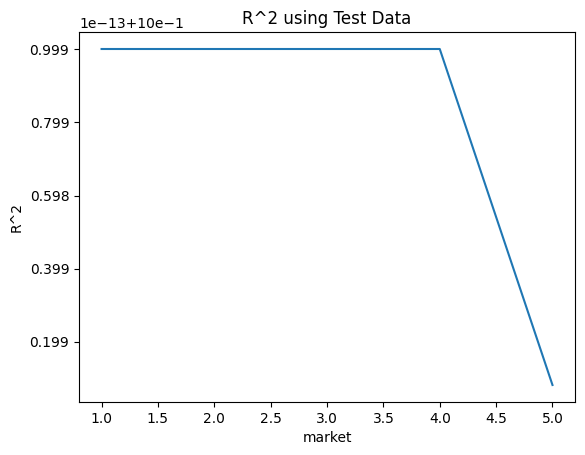

In [ ]:
#Plot the values of R^2 scores against the order.
plt.plot(market, Rsqu_test)
plt.xlabel('market')
plt.ylabel('R^2')
plt.title('R^2 using Test Data')

In [ ]:
# Ridge Regression: now consider that you have multiple features and create a polynomail feature model that uses all these parameters with degree=2. also create the training and testing attributes sets.

pr = PolynomialFeatures(degree = 2)
x_train_pr = pr.fit_transform(x_train[['Close','High','Volume','Low']])
x_test_pr = pr.fit_transform(x_test[['Close','High','Volume','Low']])

In [ ]:
%pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from tqdm import tqdm

In [ ]:
#create a Ridge regression model and evaluate it using values of the hyperparameter alpha ranging form 0.001 to 1 with increments 0f 0.001. create a list of all Ridge regression R^2 scores for traings annd testing data.

Rsqu_test=[]
Rsqu_train=[]
Alpha =  np.arange(0.001,1,0.001)
pbar =tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha)
    RigeModel.fit(x_train_pr,y_train)
    test_score,train_score = RigeModel.score(x_test_pr,y_test),RigeModel.score(x_train_pr, y_train)
    pbar.set_postfix({'Test_score':test_score,'Train_Score':train_score})
    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 999/999 [00:16<00:00, 58.89it/s, Test_score=1, Train_Score=1]


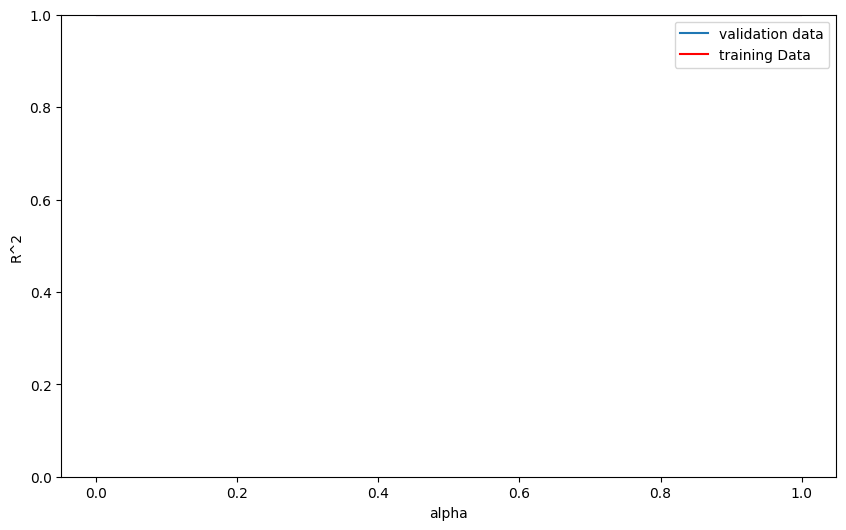

In [ ]:
plt.figure(figsize=(10, 6))  
plt.plot(Alpha, Rsqu_test, label='validation data')
plt.plot(Alpha, Rsqu_train, 'r', label='training Data')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.ylim(0, 1)
plt.legend()

In [ ]:
#Grid search: tousing the raw data and the same set of features as used above, use GridSearchCV to identify the value of alpha for which the model performs best.  
p_1=[{'alpha':[0.0001,0.001,0.01,0.1,1,10]}]


In [ ]:
#creating a ridge instance and run grid search using a 4 fold cross validation. 
RR=Ridge()
Grid1 = GridSearchCV(RR, p_1, cv=4)

In [ ]:
Grid1.fit(x_train[['Close','High','Low','Volume']], y_train)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}])

In [ ]:
#print the R^2 score for test data using the estimator that uses the derived optimum value of alpha.
BestRR = Grid1.best_estimator_
print(BestRR.score(x_test[['Close','High','Low','Volume']], y_test))

1.0


Done !